In [1]:
import pandas as pd
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import os
import matplotlib.pyplot as plt


df_pv_yearly = pd.read_csv('pv_metrics_yearly.csv')
df_pv_sprsum = pd.read_csv('pv_metrics_3-9.csv')
df_pv_summer = pd.read_csv('pv_metrics_6-8.csv')


df_xg_yearly = pd.read_csv('xg_metrics_yearly.csv')
df_xg_sprsum = pd.read_csv('xg_metrics_3-9.csv')
df_xg_summer = pd.read_csv('xg_metrics_6-8.csv')
df_xg_winter = pd.read_csv('xg_metrics_1-3.csv')


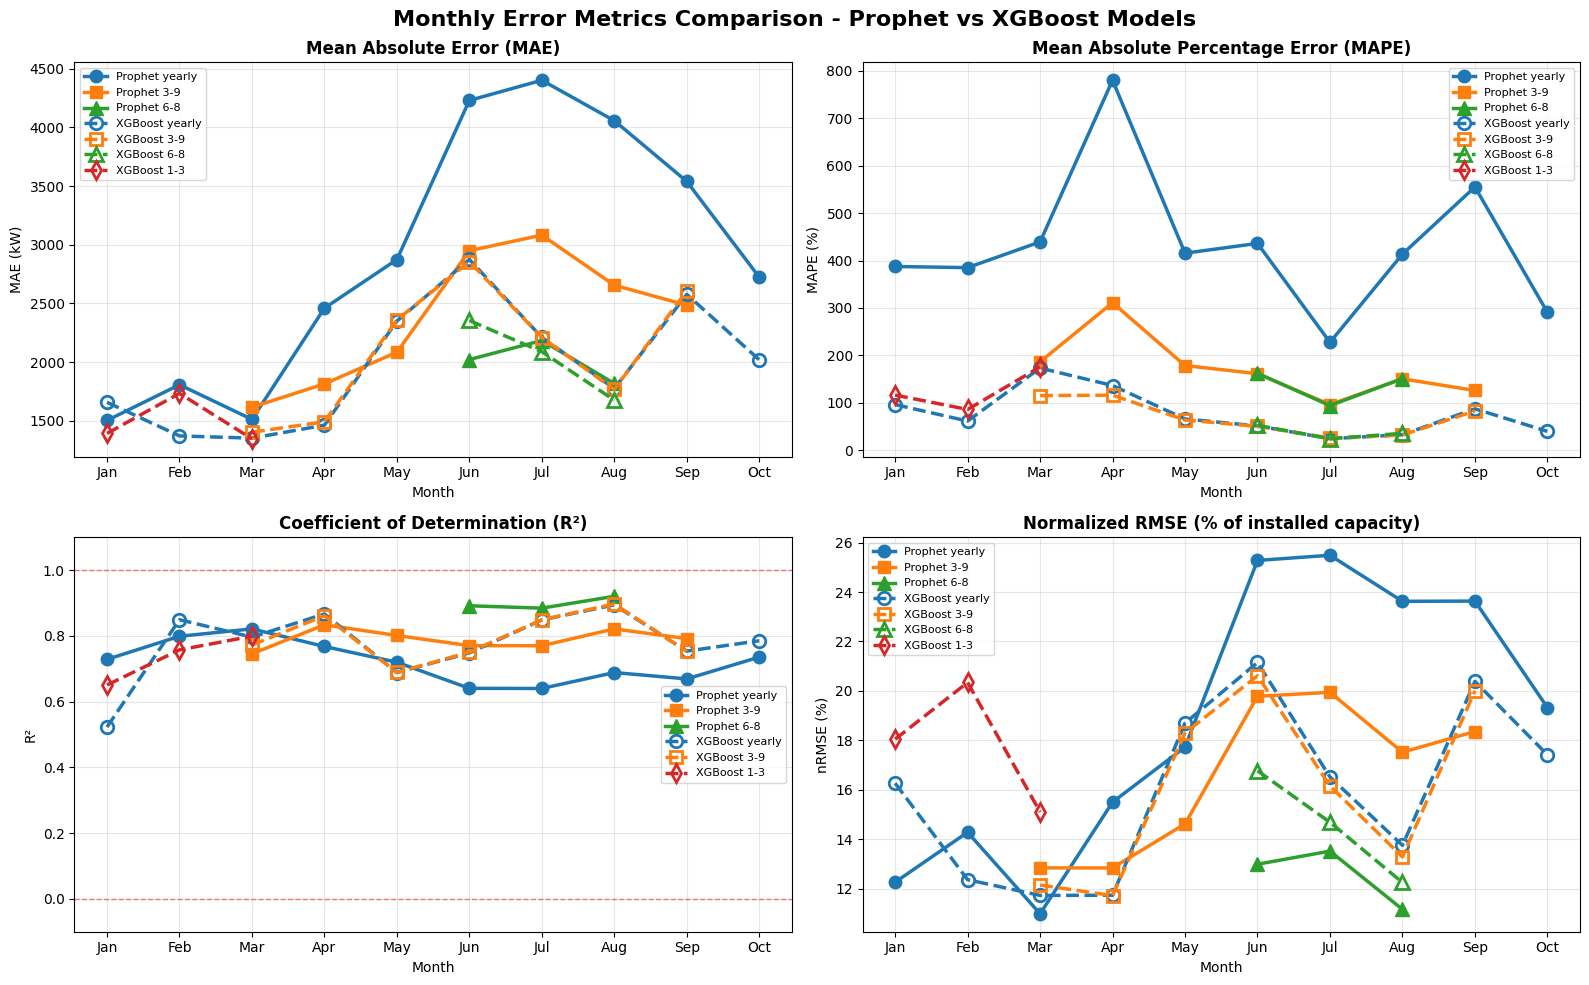

In [2]:
# Create figure with 4 subplots (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Monthly Error Metrics Comparison - Prophet vs XGBoost Models', fontsize=16, fontweight='bold')

# Flatten axes for easier indexing
axes = axes.flatten()

# Define months for each dataset
months_pv_yearly = df_pv_yearly['Month'].tolist()
months_pv_sprsum = df_pv_sprsum['Month'].tolist()
months_pv_summer = df_pv_summer['Month'].tolist()

months_xg_yearly = df_xg_yearly['Month'].tolist()
months_xg_sprsum = df_xg_sprsum['Month'].tolist()
months_xg_summer = df_xg_summer['Month'].tolist()
months_xg_winter = df_xg_winter['Month'].tolist()

# Plot 1: Mean Absolute Error (MAE)
# Prophet models - solid lines with filled markers
axes[0].plot(months_pv_yearly, df_pv_yearly['MAE'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#1f77b4', markeredgecolor='#1f77b4', label='Prophet yearly')
axes[0].plot(months_pv_sprsum, df_pv_sprsum['MAE'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#ff7f0e', markeredgecolor='#ff7f0e', label='Prophet 3-9')
axes[0].plot(months_pv_summer, df_pv_summer['MAE'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='-', markerfacecolor='#2ca02c', markeredgecolor='#2ca02c', label='Prophet 6-8')
# XGBoost models - dashed lines with hollow markers
axes[0].plot(months_xg_yearly, df_xg_yearly['MAE'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#1f77b4', markeredgewidth=2, label='XGBoost yearly')
axes[0].plot(months_xg_sprsum, df_xg_sprsum['MAE'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#ff7f0e', markeredgewidth=2, label='XGBoost 3-9')
axes[0].plot(months_xg_summer, df_xg_summer['MAE'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='--', markerfacecolor='none', markeredgecolor='#2ca02c', markeredgewidth=2, label='XGBoost 6-8')
axes[0].plot(months_xg_winter, df_xg_winter['MAE'], marker='d', color='#d62728', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#d62728', markeredgewidth=2, label='XGBoost 1-3')
axes[0].set_title('Mean Absolute Error (MAE)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Month', fontsize=10)
axes[0].set_ylabel('MAE (kW)', fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=8, loc='best')

# Plot 2: Mean Absolute Percentage Error (MAPE)
# Prophet models - solid lines with filled markers
axes[1].plot(months_pv_yearly, df_pv_yearly['MAPE'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#1f77b4', markeredgecolor='#1f77b4', label='Prophet yearly')
axes[1].plot(months_pv_sprsum, df_pv_sprsum['MAPE'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#ff7f0e', markeredgecolor='#ff7f0e', label='Prophet 3-9')
axes[1].plot(months_pv_summer, df_pv_summer['MAPE'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='-', markerfacecolor='#2ca02c', markeredgecolor='#2ca02c', label='Prophet 6-8')
# XGBoost models - dashed lines with hollow markers
axes[1].plot(months_xg_yearly, df_xg_yearly['MAPE'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#1f77b4', markeredgewidth=2, label='XGBoost yearly')
axes[1].plot(months_xg_sprsum, df_xg_sprsum['MAPE'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#ff7f0e', markeredgewidth=2, label='XGBoost 3-9')
axes[1].plot(months_xg_summer, df_xg_summer['MAPE'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='--', markerfacecolor='none', markeredgecolor='#2ca02c', markeredgewidth=2, label='XGBoost 6-8')
axes[1].plot(months_xg_winter, df_xg_winter['MAPE'], marker='d', color='#d62728', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#d62728', markeredgewidth=2, label='XGBoost 1-3')
axes[1].set_title('Mean Absolute Percentage Error (MAPE)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Month', fontsize=10)
axes[1].set_ylabel('MAPE (%)', fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=8, loc='best')

# Plot 3: Coefficient of Determination (R²)
# Prophet models - solid lines with filled markers
axes[2].plot(months_pv_yearly, df_pv_yearly['R²'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#1f77b4', markeredgecolor='#1f77b4', label='Prophet yearly')
axes[2].plot(months_pv_sprsum, df_pv_sprsum['R²'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#ff7f0e', markeredgecolor='#ff7f0e', label='Prophet 3-9')
axes[2].plot(months_pv_summer, df_pv_summer['R²'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='-', markerfacecolor='#2ca02c', markeredgecolor='#2ca02c', label='Prophet 6-8')
# XGBoost models - dashed lines with hollow markers
axes[2].plot(months_xg_yearly, df_xg_yearly['R²'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#1f77b4', markeredgewidth=2, label='XGBoost yearly')
axes[2].plot(months_xg_sprsum, df_xg_sprsum['R²'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#ff7f0e', markeredgewidth=2, label='XGBoost 3-9')
axes[2].plot(months_xg_winter, df_xg_winter['R²'], marker='d', color='#d62728', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#d62728', markeredgewidth=2, label='XGBoost 1-3')
axes[2].axhline(y=1.0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[2].axhline(y=0.0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[2].set_title('Coefficient of Determination (R²)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Month', fontsize=10)
axes[2].set_ylabel('R²', fontsize=10)
axes[2].set_ylim(-0.1, 1.1)
axes[2].grid(True, alpha=0.3)
axes[2].legend(fontsize=8, loc='best')

# Plot 4: Normalized RMSE (% of installed capacity)
# Prophet models - solid lines with filled markers
axes[3].plot(months_pv_yearly, df_pv_yearly['nRMSE'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#1f77b4', markeredgecolor='#1f77b4', label='Prophet yearly')
axes[3].plot(months_pv_sprsum, df_pv_sprsum['nRMSE'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#ff7f0e', markeredgecolor='#ff7f0e', label='Prophet 3-9')
axes[3].plot(months_pv_summer, df_pv_summer['nRMSE'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='-', markerfacecolor='#2ca02c', markeredgecolor='#2ca02c', label='Prophet 6-8')
# XGBoost models - dashed lines with hollow markers
if 'nRMSE' in df_xg_yearly.columns:
    axes[3].plot(months_xg_yearly, df_xg_yearly['nRMSE'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#1f77b4', markeredgewidth=2, label='XGBoost yearly')
if 'nRMSE' in df_xg_sprsum.columns:
    axes[3].plot(months_xg_sprsum, df_xg_sprsum['nRMSE'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#ff7f0e', markeredgewidth=2, label='XGBoost 3-9')
if 'nRMSE' in df_xg_summer.columns:
    axes[3].plot(months_xg_summer, df_xg_summer['nRMSE'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='--', markerfacecolor='none', markeredgecolor='#2ca02c', markeredgewidth=2, label='XGBoost 6-8')
if 'nRMSE' in df_xg_winter.columns:
    axes[3].plot(months_xg_winter, df_xg_winter['nRMSE'], marker='d', color='#d62728', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#d62728', markeredgewidth=2, label='XGBoost 1-3')
axes[3].set_title('Normalized RMSE (% of installed capacity)', fontsize=12, fontweight='bold')
axes[3].set_xlabel('Month', fontsize=10)
axes[3].set_ylabel('nRMSE (%)', fontsize=10)
axes[3].grid(True, alpha=0.3)
axes[3].legend(fontsize=8, loc='best')

plt.tight_layout()

plt.show()

